In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tripdata = pd.read_csv('D:\\Downloads\\FullStory _ Data Scientist_files\\yellow_tripdata_2014-06.csv')

In [3]:
tripdata.shape

(13813029, 18)

In [4]:
tripdata.describe()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
count,1.381303e+07,1.381303e+07,1.381303e+07,1.381303e+07,1.381303e+07,1.381303e+07,1.381303e+07,1.381303e+07,1.381303e+07,1.381303e+07,1.381303e+07,1.381303e+07,1.381303e+07
mean,1.700198e+00,4.741762e+00,-7.202759e+01,3.967759e+01,1.037060e+00,-7.203567e+01,3.968305e+01,1.297859e+01,3.213884e-01,4.979662e-01,1.542654e+00,3.008088e-01,1.564204e+01
std,1.358524e+00,3.963621e+03,1.184604e+01,6.523708e+00,3.524311e-01,1.181637e+01,6.511587e+00,1.072187e+01,3.601558e-01,3.182427e-02,2.387206e+00,1.328803e+00,1.300702e+01
min,0.000000e+00,0.000000e+00,-8.739821e+02,-1.389435e+01,0.000000e+00,-1.622466e+02,-1.481530e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.090000e+00,-7.399210e+01,4.073404e+01,1.000000e+00,-7.399140e+01,4.073277e+01,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,8.300000e+00
50%,1.000000e+00,1.800000e+00,-7.398161e+01,4.075215e+01,1.000000e+00,-7.397974e+01,4.075252e+01,9.500000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.150000e+01
75%,2.000000e+00,3.300000e+00,-7.396632e+01,4.076668e+01,1.000000e+00,-7.396217e+01,4.076767e+01,1.500000e+01,5.000000e-01,5.000000e-01,2.100000e+00,0.000000e+00,1.750000e+01
max,9.000000e+00,1.180000e+07,1.305749e+02,7.109613e+01,2.210000e+02,1.371100e+02,4.972333e+02,7.885000e+02,1.350000e+01,5.000000e-01,2.923100e+02,1.006600e+02,9.339300e+02


In [5]:
tripdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13813029 entries, 0 to 13813028
Data columns (total 18 columns):
vendor_id              object
pickup_datetime        object
dropoff_datetime       object
passenger_count        int64
 trip_distance         float64
pickup_longitude       float64
pickup_latitude        float64
rate_code              int64
 store_and_fwd_flag    object
dropoff_longitude      float64
dropoff_latitude       float64
payment_type           object
fare_amount            float64
surcharge              float64
mta_tax                float64
tip_amount             float64
tolls_amount           float64
total_amount           float64
dtypes: float64(11), int64(2), object(5)
memory usage: 1.9+ GB


In [6]:
tripdata.sample(10)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
11603325,VTS,2014-06-02 10:28:00,2014-06-02 10:41:00,1,2.17,-73.978892,40.736365,1,NaN,-73.974765,40.760660,CRD,11.0,0.0,0.5,1.00,0.00,12.50
8503888,CMT,2014-06-17 15:44:56,2014-06-17 16:06:39,1,1.80,-73.990412,40.751404,1,N,-73.971767,40.760411,CRD,14.0,0.0,0.5,2.90,0.00,17.40
7104444,CMT,2014-06-12 11:15:44,2014-06-12 11:20:05,1,0.40,-73.998798,40.744718,1,N,-73.994998,40.750067,CRD,4.5,0.0,0.5,1.50,0.00,6.50
2214697,VTS,2014-06-27 11:29:00,2014-06-27 11:49:00,2,3.26,0.000000,0.000000,1,NaN,0.000000,0.000000,CRD,15.5,0.0,0.5,2.00,0.00,18.00
5917353,VTS,2014-06-19 21:53:00,2014-06-19 22:00:00,1,1.49,-73.974040,40.679552,1,NaN,-73.959513,40.686452,CRD,7.0,0.5,0.5,1.88,0.00,9.88
3455379,VTS,2014-06-09 13:51:00,2014-06-09 13:52:00,1,0.31,-73.986582,40.764122,1,NaN,-73.984688,40.765802,CSH,3.5,0.0,0.5,0.00,0.00,4.00
10418895,CMT,2014-06-27 11:18:06,2014-06-27 12:08:54,1,10.30,-73.874845,40.774233,1,N,-73.978367,40.761409,CRD,39.5,0.0,0.5,6.60,5.33,51.93
256009,VTS,2014-06-22 00:22:00,2014-06-22 00:48:00,1,4.92,-73.988865,40.748585,1,NaN,-73.965360,40.712752,CRD,20.5,0.5,0.5,5.25,0.00,26.75
3870835,VTS,2014-06-14 15:21:00,2014-06-14 15:27:00,1,0.81,-74.005982,40.740337,1,NaN,-73.999037,40.744555,CRD,5.5,0.0,0.5,1.65,0.00,7.65
8731254,CMT,2014-06-19 13:39:59,2014-06-19 13:43:19,1,0.20,-73.987698,40.749852,1,N,-73.984786,40.751483,CRD,4.0,0.0,0.5,0.90,0.00,5.40


In [7]:
# Notes/Observations:

# It seems unlikely a trip was actually 11,800,001 miles, and there are records where there are no passengers,
# no trip_distance, etc. There is bad data present.

# With that said, I should investigate the 0 passenger trips. It could be more than bad data and may be something the driver
# should avoid.

# Trip distance appears to be in miles. Outside spotcheck of calculations shows the latitudes and logitudes are at an accuracy of
# 0.11 meters (or 4.37 inches). This is too accurate for this problem and should be generalized somewhat. Use Geopy to bring
# to the street level (or building if more accuracy needed).


# Columns to be added:
# A new column should be added for total trip time (dropoff_datetime - pickup_datetime)
# A new column should be added for time of day, rounded to the minute or so (or 15 minutes)
# A column for day of the week would be useful as well. If I can only work 10 hours, I should know what days would be best


#Columns to be removed:
# MTA_tax: unneeded. It is a flat value for all trips with a fare amount. It can be safely dropped. 

# Store_and_fwd_flag: Unneeded as it just indicates whether the driver had internet connection to the server.MAY BE CONNECTED 
# TO BAD DATA?

# Payment_Type: I can't control what the customer pays with and it is not something we would have at time of pickup. 
# If there is a correlation to a location (i.e.# customers who pay with a card pay more and come from X location)
# it will show up in the location/total_amount interaction.

# Passenger count is interesting, but does not appear to affect the total price. It may affect time, but I will need to find out
# later. Useful for analysis. It shouldn't be used in the model as it is unlikely to know how many passengers will be picked up

# Dropping rate_code. Does not match data dictionary and has no relationship with any of the other data. 

# Columns to be changed:
# Vendor_id and rate_code need to be one_hot encoded to learn more


In [8]:
#Making transformations and dropping columns
vid_ohe = pd.get_dummies(tripdata['vendor_id'])

tripdata = pd.concat([tripdata, vid_ohe], axis=1)
tripdata.head(10)
tripdata.drop(['vendor_id','mta_tax','payment_type',' store_and_fwd_flag','payment_type'], axis=1)

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,tip_amount,tolls_amount,total_amount,CMT,VTS
0,2014-06-30 00:10:16,2014-06-30 00:25:10,1,4.40,-73.994076,40.720134,1,-73.957112,40.680575,15.5,0.5,2.50,0.00,19.00,1,0
1,2014-06-30 02:09:23,2014-06-30 02:20:36,2,3.00,-74.007392,40.741116,1,-73.987471,40.765773,12.0,0.5,2.60,0.00,15.60,1,0
2,2014-06-30 03:53:38,2014-06-30 04:08:15,2,4.70,-74.005937,40.740136,1,-73.954163,40.778651,16.0,0.5,3.40,0.00,20.40,1,0
3,2014-06-30 00:51:46,2014-06-30 01:08:46,1,4.60,-73.986055,40.756408,1,-73.959327,40.811957,16.0,0.5,1.00,0.00,18.00,1,0
4,2014-06-30 01:04:22,2014-06-30 01:13:40,1,2.50,-73.948077,40.706921,1,-73.959047,40.683061,9.5,0.5,2.10,0.00,12.60,1,0
5,2014-06-30 00:06:59,2014-06-30 00:30:26,1,5.90,-73.998451,40.750133,5,-74.027158,40.749733,60.0,0.0,0.00,9.00,69.00,1,0
6,2014-06-30 00:53:12,2014-06-30 01:09:19,1,8.00,-73.988839,40.763557,1,-73.930570,40.853626,25.0,0.5,1.00,0.00,27.00,1,0
7,2014-06-30 02:10:18,2014-06-30 02:15:35,2,0.70,-74.012543,40.714992,1,-74.007223,40.708394,5.5,0.5,1.00,0.00,7.50,1,0
8,2014-06-30 00:37:02,2014-06-30 00:40:13,2,0.60,-73.990795,40.734907,1,-73.991810,40.729850,4.5,0.5,1.65,0.00,7.15,1,0
9,2014-06-30 01:56:59,2014-06-30 02:14:09,1,5.70,-73.969189,40.753998,1,-73.952813,40.736368,18.5,0.5,1.50,0.00,21.00,1,0


In [32]:
#Data Cleanup

print(tripdata.shape)
cleantripdata = tripdata[(tripdata.pickup_longitude <= -70) 
                         & (tripdata.pickup_latitude >= 40) 
                         & (tripdata.dropoff_longitude <= -70) 
                         & (tripdata.dropoff_latitude >= 40)
                        & (tripdata.total_amount <=2000)]
print(cleantripdata.shape)

cleantripdata['pickup_datetime'] = pd.to_datetime(cleantripdata.pickup_datetime)
cleantripdata['dropoff_datetime'] = pd.to_datetime(cleantripdata.pickup_datetime)

cleantripdata['pickup_date'] = cleantripdata['pickup_datetime'].dt.normalize()
cleantripdata['pickup_dow'] = cleantripdata['pickup_datetime'].dt.dayofweek
cleantripdata['pickup_dow'] = cleantripdata['pickup_datetime'].dt.day_name()
cleantripdata['pickup_hour'] = pd.to_datetime(cleantripdata['pickup_datetime'], format='%H:%M').dt.hour

cleantripdata['dropoff_date'] = cleantripdata['dropoff_datetime'].dt.normalize()
cleantripdata['dropoff_dow'] = cleantripdata['dropoff_datetime'].dt.dayofweek
cleantripdata['dropoff_dow'] = cleantripdata['dropoff_datetime'].dt.day_name()
cleantripdata['dropoff_hour'] = pd.to_datetime(cleantripdata['dropoff_datetime'], format='%H:%M').dt.hour

#Rounding to the nearest hundredth of a degree. This should bring us to a mile radius. 
cleantripdata['pickup_longitude'] = cleantripdata.pickup_longitude.round(2)
cleantripdata['pickup_latitude'] = cleantripdata.pickup_latitude.round(2)
cleantripdata['dropoff_longitude'] = cleantripdata.dropoff_longitude.round(2)
cleantripdata['dropoff_latitude'] = cleantripdata.dropoff_latitude.round(2)

(13813029, 20)
(13420957, 20)


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

In [10]:
### The below code runs too slowly to apply to even a good sample size and the geodata does not
### always have the pieces of data I need. Additional logic can be added (try to get that section of address, else 'null')
### but it would still run too slowly on my machine. 

### Alternate way forward, round the GPS to something we can generalize, then translate those general areas later. 


# from geopy.geocoders import Nominatim
# import time

# geolocator = Nominatim(user_agent="trip_data")

# test = cleantripdata.sample(100)

# start_time = time.time()

# lambdafunc = lambda x: pd.Series([
#     geolocator.reverse(str(x['pickup_latitude'])+","+str(x['pickup_longitude'])).raw['address']['suburb']
#     ,geolocator.reverse(str(x['pickup_latitude'])+","+str(x['pickup_longitude'])).raw['address']['county']
#     ,geolocator.reverse(str(x['pickup_latitude'])+","+str(x['pickup_longitude'])).raw['address']['postcode']

# ])

# test[['suburb', 'county', 'postcode']] = test.apply(lambdafunc, axis=1)


# print(" --- %s seconds ---" % (time.time() - start_time))

# test


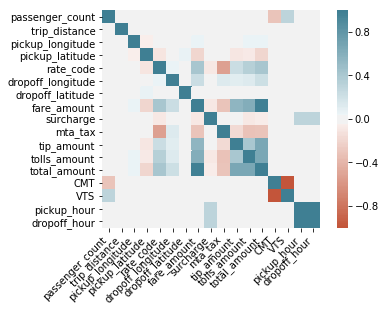

In [11]:
corr = cleantripdata.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

<Figure size 432x432 with 0 Axes>

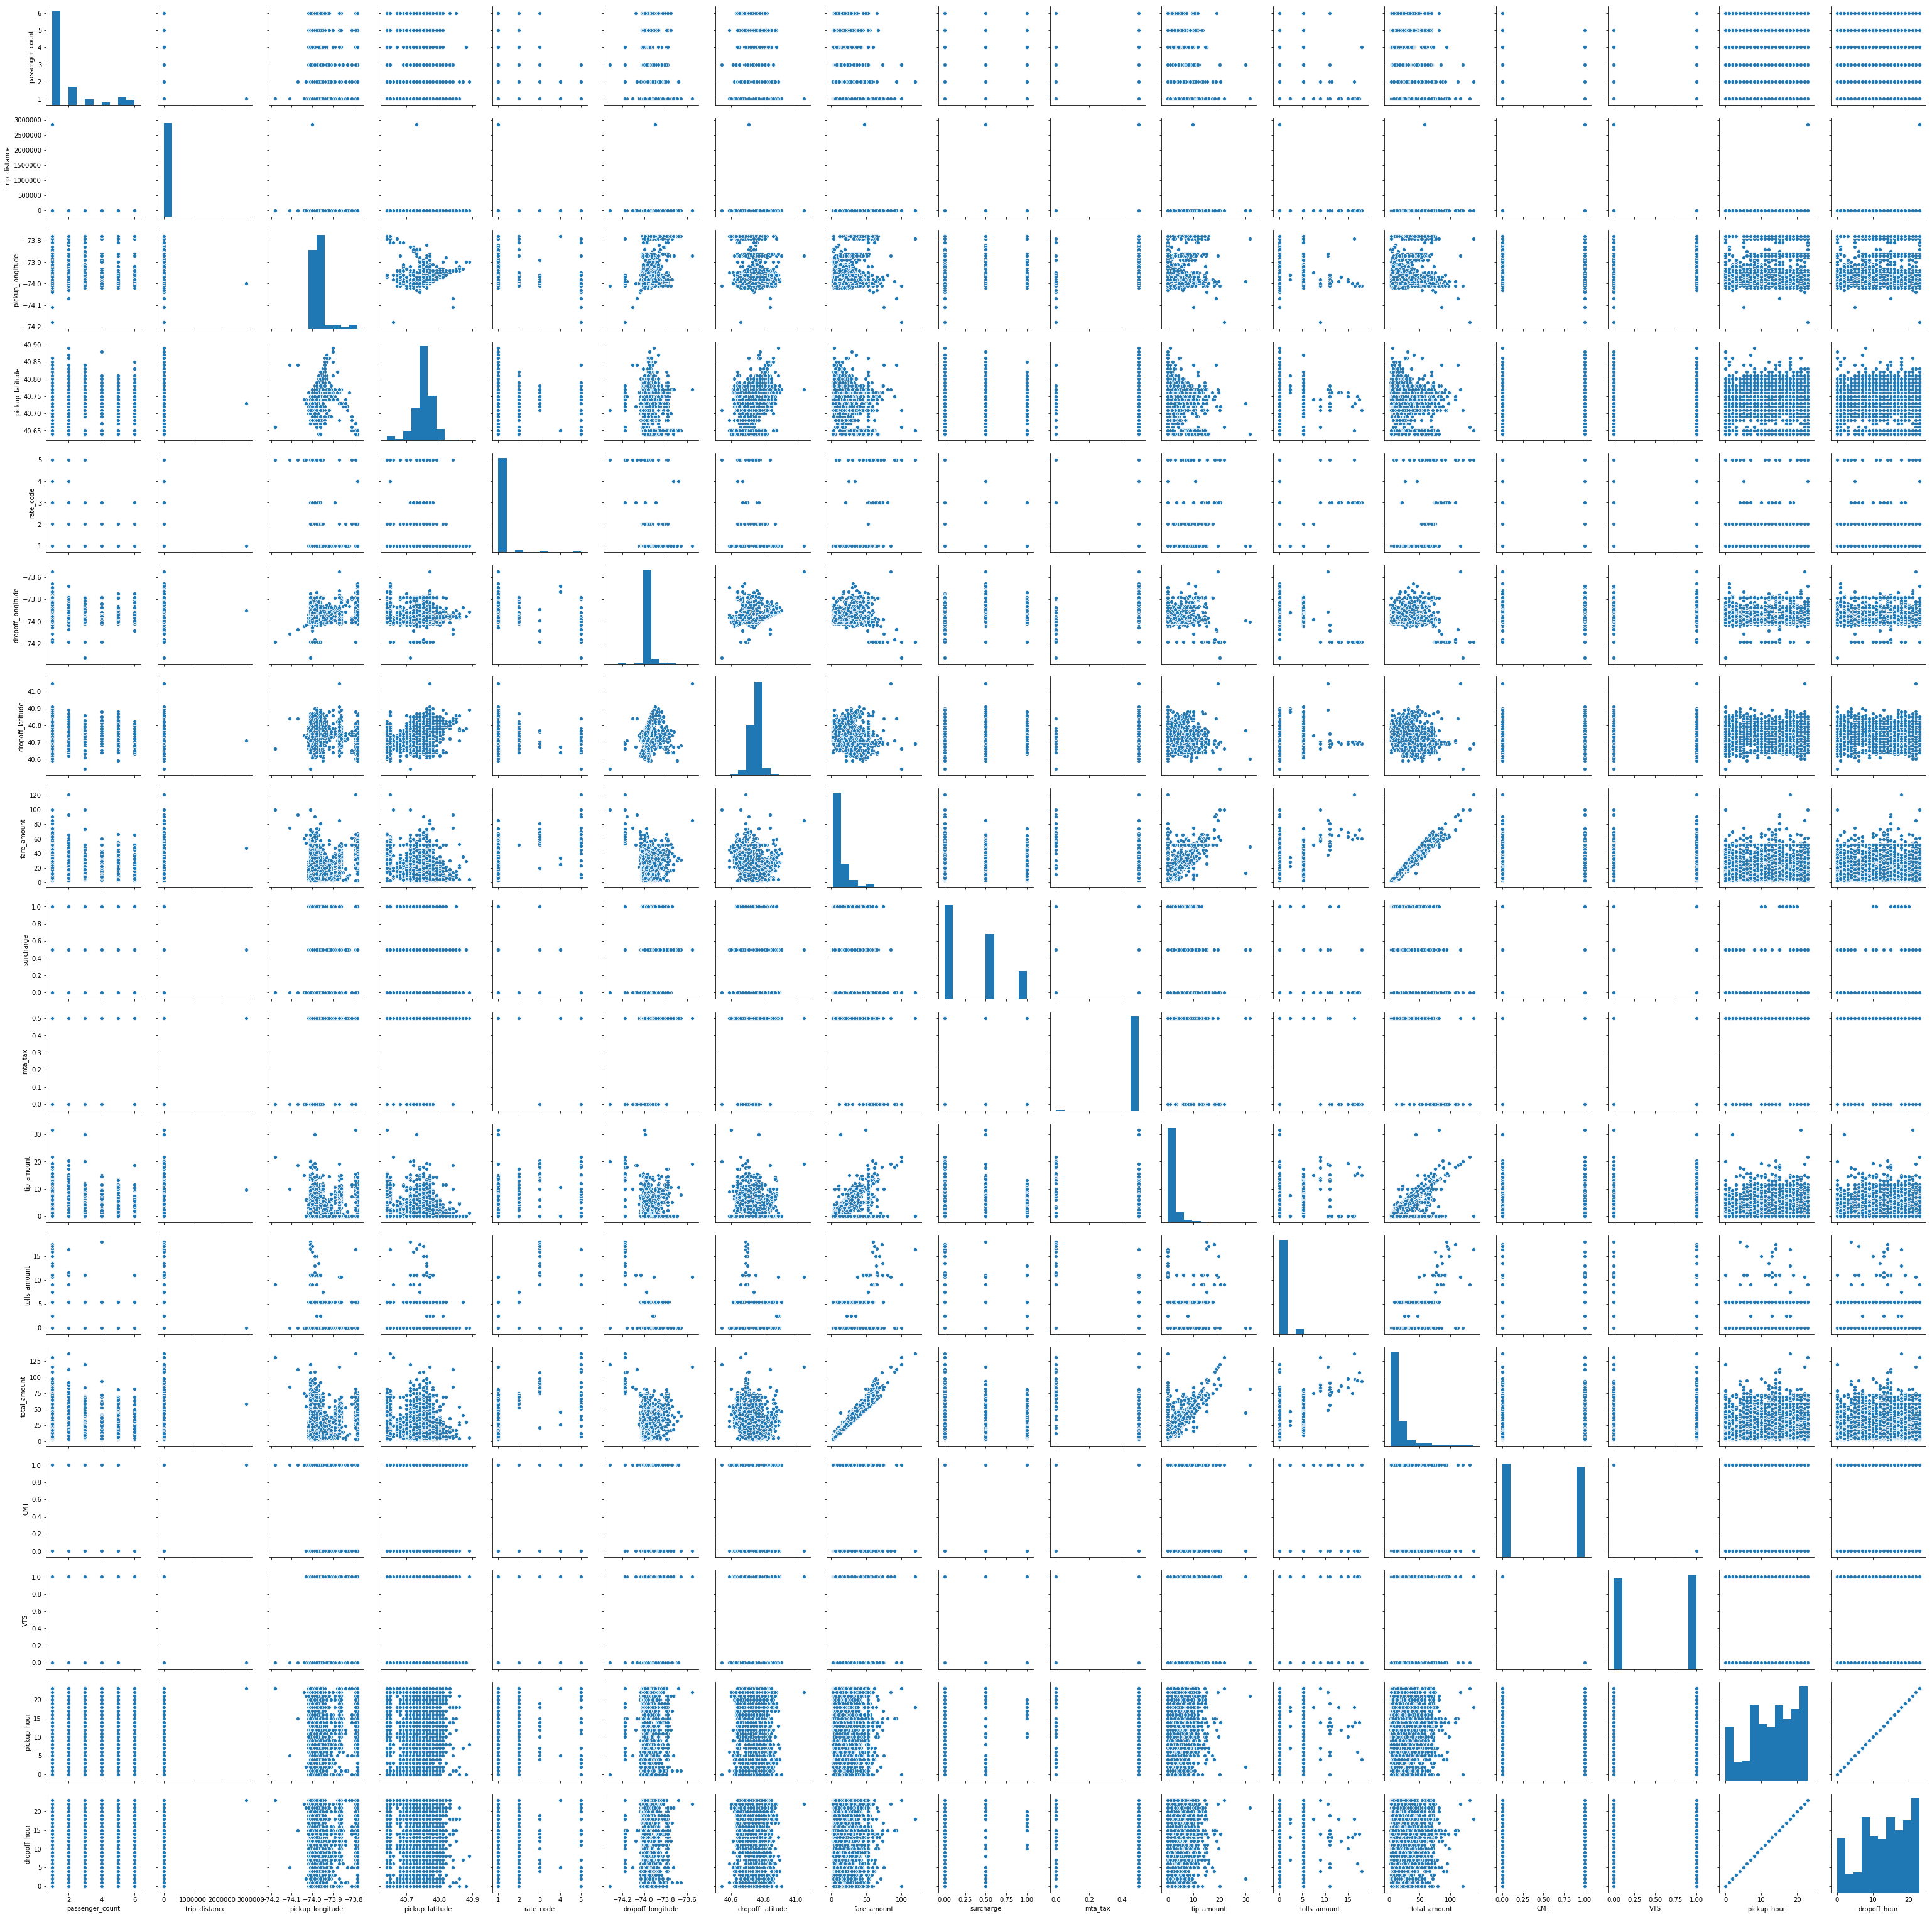

In [12]:
plt.figure(figsize=(6, 6))
sns.pairplot(cleantripdata.sample(10000))

In [13]:
# These findings are entirely expected. Tip amount is related to the trip distance, 
# in relation to the total amount of the ride. People tip in relation to the total fare amount. Trip distance 
# has approximately a linear correlation to total amount, tip amount (less so), fare amount (very linear). 
# Fare amount and tip amount are somewhat linear, but with outliers.

# For this problem, for now, I will just use the total fare amount column. If I knew more about how taxi rivers got paid
# (i.e. they keep all tips, but give 50% of fare to taxi company) then it may make more sense to optimize based on fare share
# percentage

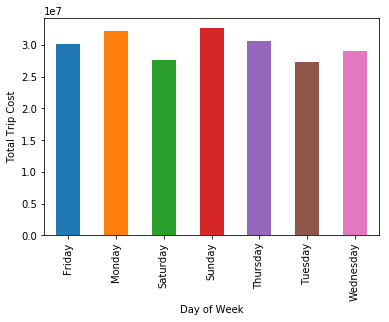

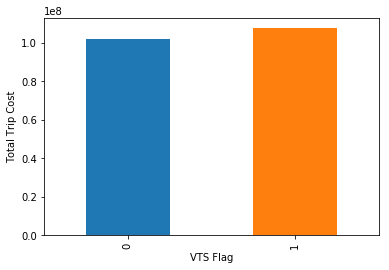

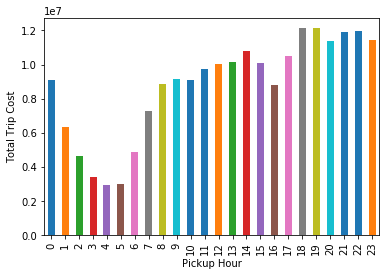

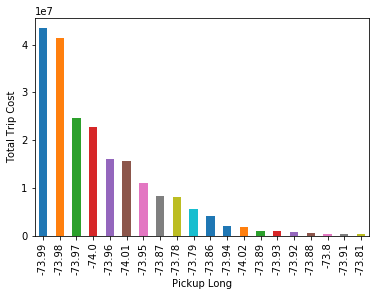

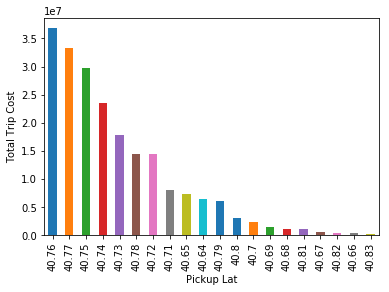

2.7861013412475586


In [50]:
import time

start = time.time()

# Plotting which days result in the highest fares
dow_plot = cleantripdata['total_amount'].groupby(cleantripdata['pickup_dow']).sum().plot(kind='bar')
dow_plot.set_xlabel("Day of Week")
dow_plot.set_ylabel("Total Trip Cost")
plt.show()

# Plotting which vendor ID/type results in the highest fares
vts_plot = cleantripdata['total_amount'].groupby(cleantripdata['VTS']).sum().plot(kind='bar')
vts_plot.set_xlabel("VTS Flag")
vts_plot.set_ylabel("Total Trip Cost")
plt.show()

# Plotting the time of day in relation to total fare amount
pickuphour_plot = cleantripdata['total_amount'].groupby(cleantripdata['pickup_hour']).sum().plot(kind='bar')
pickuphour_plot.set_xlabel("Pickup Hour")
pickuphour_plot.set_ylabel("Total Trip Cost")
plt.show()

# Getting the top 20 latitudes and longitudes based on total fare amount per GPS location (rounded to nearest mile)
top_longs = cleantripdata['total_amount'].groupby(cleantripdata['pickup_longitude']).sum()
top_longs = top_longs.sort_values(ascending=False).head(20)
top_lats = cleantripdata['total_amount'].groupby(cleantripdata['pickup_latitude']).sum()
top_lats = top_lats.sort_values(ascending=False).head(20)

# Plotting the top 20 longitudes
pickuplong_plot = top_longs.plot(kind='bar')
pickuplong_plot.set_xlabel("Pickup Long")
pickuplong_plot.set_ylabel("Total Trip Cost")
plt.show()

# Plotting the top 20 latitudes
pickuplat_plot = top_lats.plot(kind='bar')
pickuplat_plot.set_xlabel("Pickup Lat")
pickuplat_plot.set_ylabel("Total Trip Cost")
plt.show()

print(time.time() - start)

### Final Notes ###

While I would love to continue to experiment in this space, I am turning the analysis in at this point. 

From this analysis, we can tell that the best time to be a taxi driver is Monday and Sunday, typically between 6PM and midnight. The best location is around midtown manhattan (roughly near Times Square and Central Park). Ideally, being a VTS driver will increase the total amount earned slightly as well.

If a driver only has 10 hours a week he can drive, he should focus on being in midtown manhattan between 6PM and 11PM Sundays and Mondays as a VTS driver.

There is a lot more work that can go into this to verify, validate, and optimize things, but this is a good place to start for now.